### Student Information
Name: 

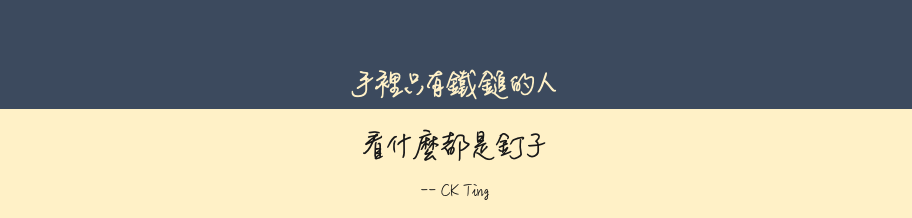
### Instruction

Instuctor: Winnie YH Zhao 
  
Welcome to NEAF DIP workshop! :)  
Here we prepare some widely used methods to let you practice, including:
1. Histogram Equalization
2. Mean blur, Median blur, Gaussian blur
3. Binary
4. HSV filter
5. Morphological: erosion, dilation, open, close
6. Find contours

Those skills are very powerful and important skills, please enjoy learning and put them into good use :)

## 1. Histogram Equalization
Histogram is the method to enhance image contrast.  
Please show the image grayscale histogram and do the equlization, and show the image result and histogram equalization result.  
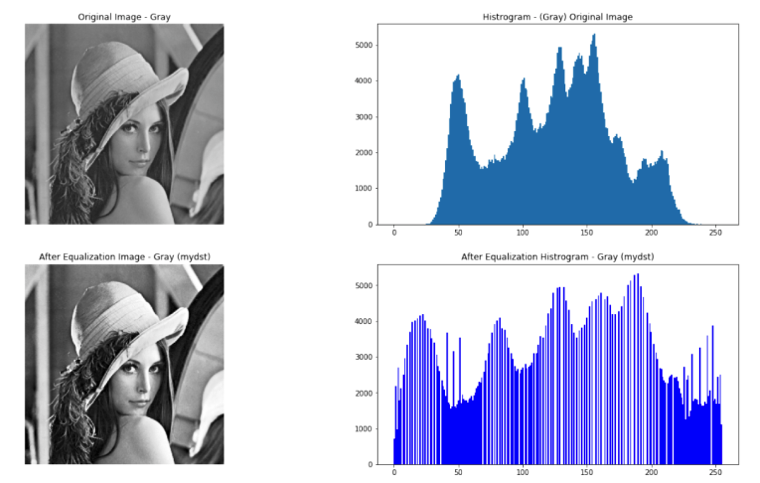

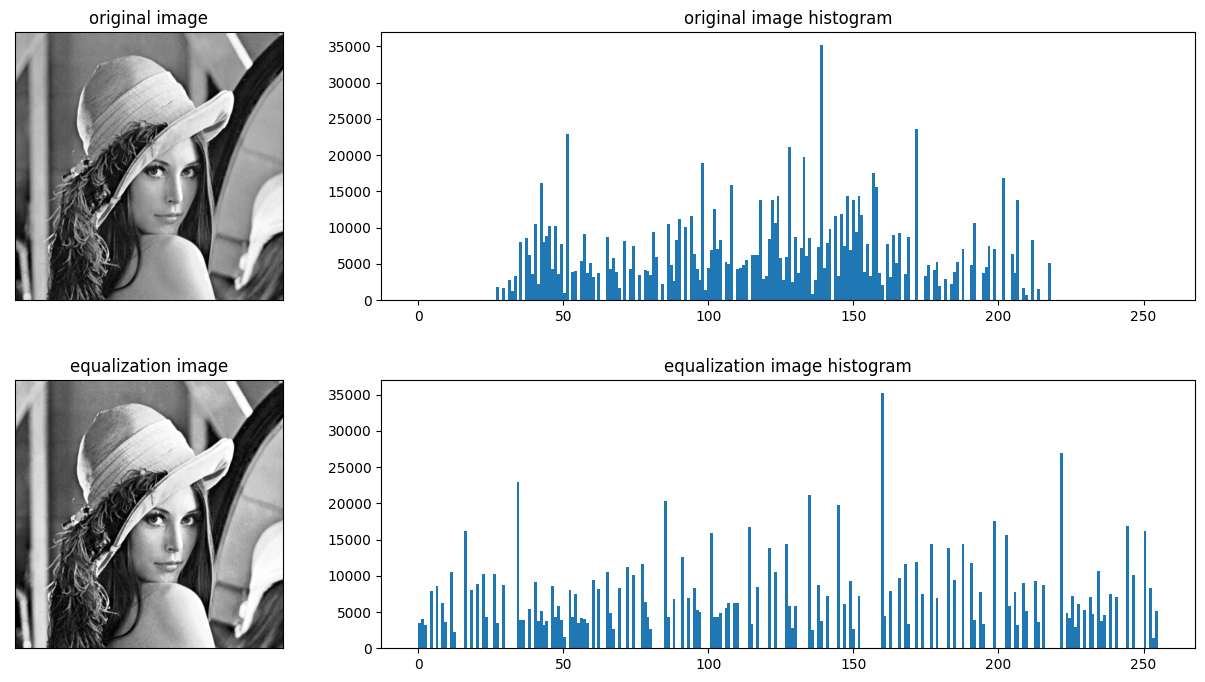

True

In [238]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def show_img(img, title, type = "gray", use_ticks = True):
    plt.title(title)
    if use_ticks == False:
        plt.xticks([])
        plt.yticks([])
    if type == "color":
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.imshow(img)
    else:
        plt.imshow(img, "gray")

img_ori = cv2.imread('input/lena.bmp', cv2.IMREAD_GRAYSCALE) # Read image as gray.

plt.figure(figsize = (16, 8))
plt.subplots_adjust(wspace = 0.1, hspace = 0.3)

# show origin image result
plt.subplot2grid((2, 3), (0, 0), colspan = 1)
show_img(img_ori, 'original image', 'gray', False)

# show origin image histogram result
plt.subplot2grid((2, 3), (0, 1), colspan = 2)
plt.title('original image histogram')
plt.hist(img_ori.ravel(), 256, [0, 255])

# show image equalization result
img_equa = cv2.equalizeHist(img_ori)
plt.subplot2grid((2, 3), (1, 0), colspan = 1)
show_img(img_equa, 'equalization image', 'gray', False)

# show image equalization histogram result
plt.subplot2grid((2, 3), (1, 1), colspan = 2)
plt.title('equalization image histogram')
plt.hist(img_equa.ravel(), 256)
plt.show()

# save figure
cv2.imwrite('output/img_ori.bmp', img_ori)
cv2.imwrite('output/img_equa.bmp', img_equa)

keywords: plt.hist, cv2.equalizeHist, cv2.calcHist

## 2. Mean blur, Gaussian blur, Median blur
Blur is a method to deal with the noise on the image.
Please input the image and use different kernel size to show blur result.
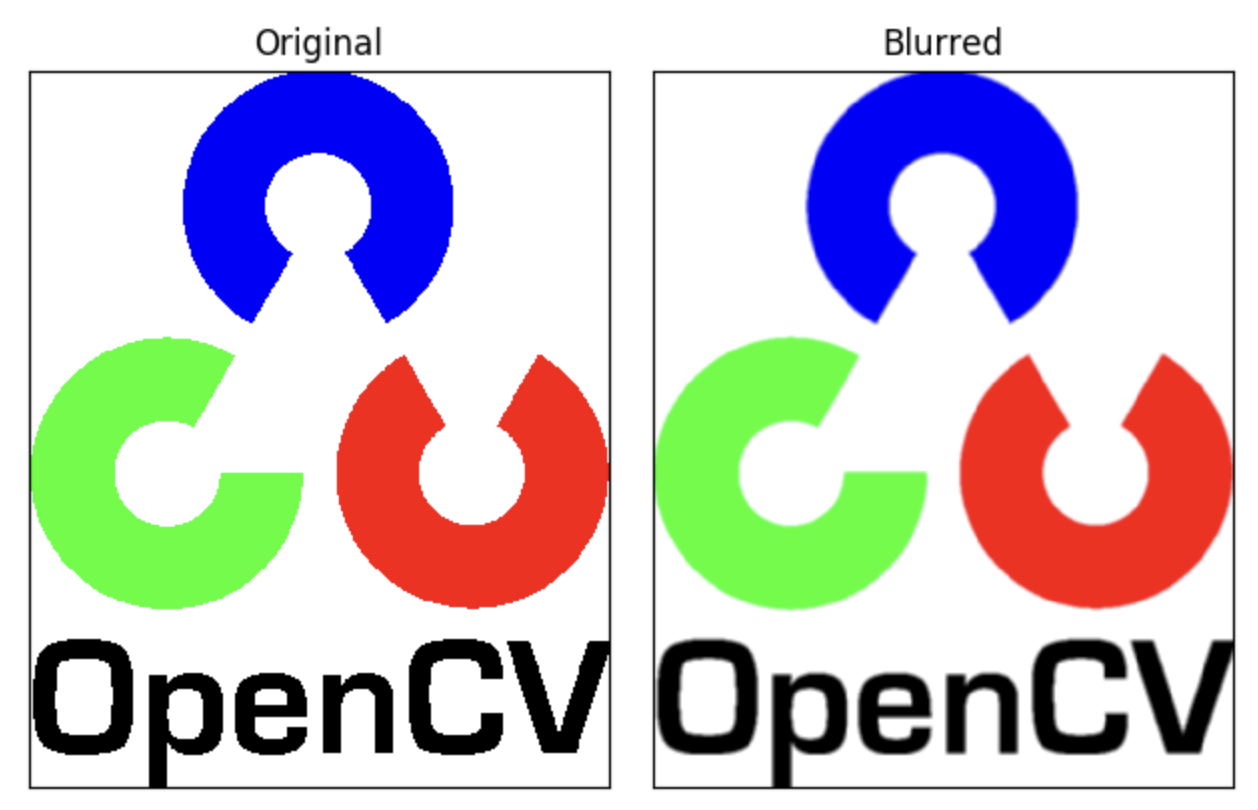
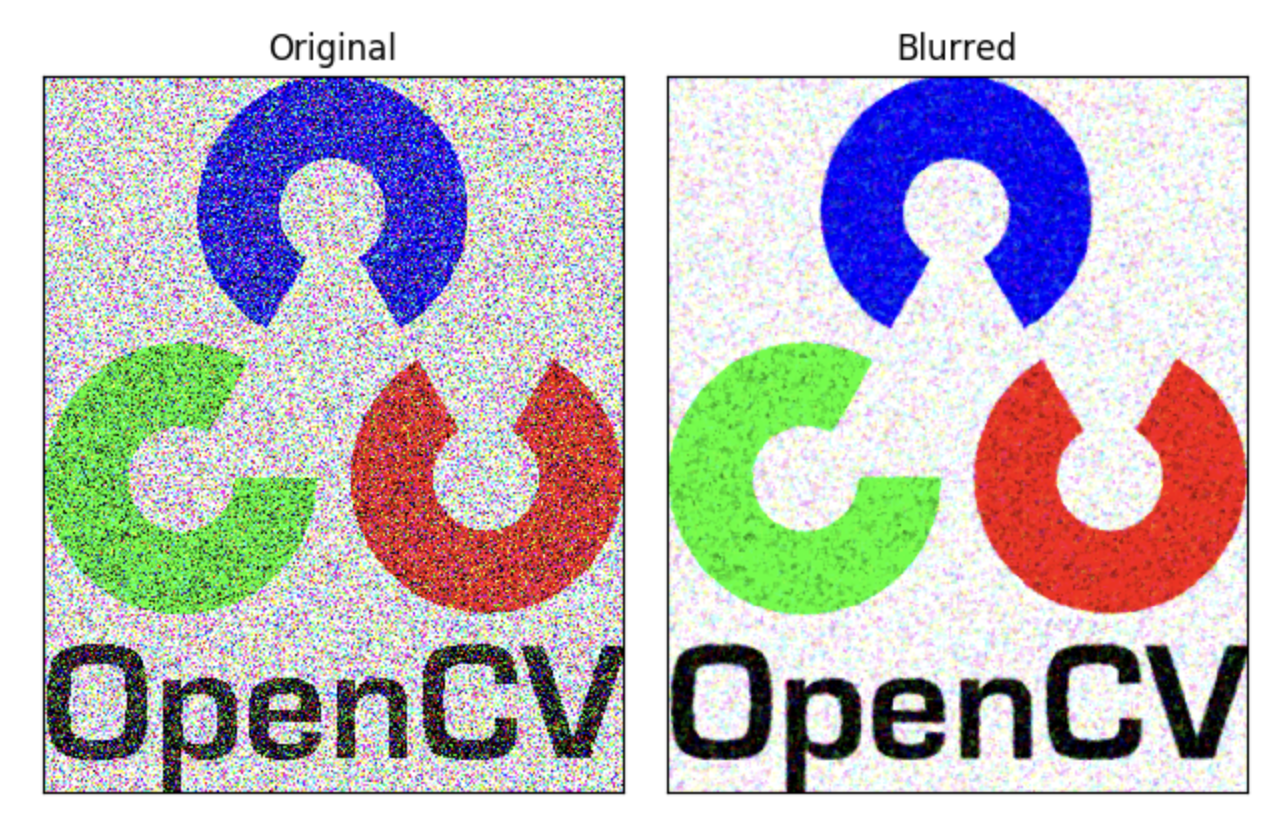

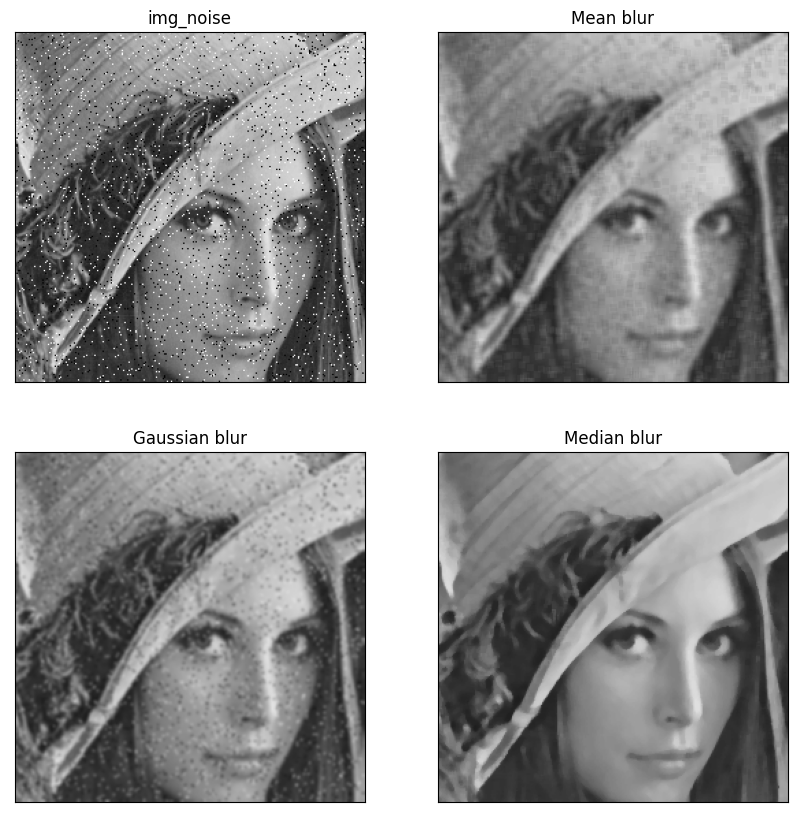

True

In [239]:
img_noise = cv2.imread('input/lena_noise.png', cv2.IMREAD_GRAYSCALE)

# Blur the image by three methods.
img_noise = cv2.cvtColor(img_noise, cv2.COLOR_BGR2RGB)

img_mean_blur = cv2.blur(img_noise, (5, 5))
img_gaussian_blur = cv2.GaussianBlur(img_noise, (5, 5), 0)
img_median_blur = cv2.medianBlur(img_noise, 5)

plt.figure(figsize = (10, 10))
plt.subplot(221)
show_img(img_noise, 'img_noise', 'gray', False)
plt.subplot(222)
show_img(img_mean_blur, 'Mean blur', 'gray', False)
plt.subplot(223)
show_img(img_gaussian_blur, 'Gaussian blur', 'gray', False)
plt.subplot(224)
show_img(img_median_blur, 'Median blur', 'gray', False)
plt.show()

cv2.imwrite('output/img_mean_blur.png', img_mean_blur)
cv2.imwrite('output/img_gaussian_blur.png', img_gaussian_blur)
cv2.imwrite('output/img_median_blur.png', img_median_blur)

### Question:
1. What is the difference between three methods? When to use them?
2. What is the difference if the kernel size changes?  

keywords: cv2.blur, cv2.GaussianBlur, cv2.medianBlur

Answer:
1. Mean blur:輸出為kernel內各像素的均值。使用時鄰近的像素差異不能太大，適合用來去除低頻雜訊。  
   Gaussian blur:輸出為kernel內各像素的均值，但靠近中心位置的權重比較高。用來去除高斯分布的雜訊，但比較耗時。     
   Median blur:輸出為kernel內各像素的中位數。適合圖片有點狀雜訊(椒鹽雜訊)且數值差異很大的狀況使用。
     
2. kernel size越大，處理出來後的影像越模糊，輪廓越不清楚。

## 3. Binary
Binary is a method to transfer greyscale to 0 (black) and 255 (white) only.  
Please do the image binary to seperate pad and background.  
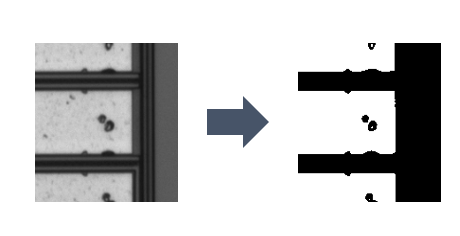

True

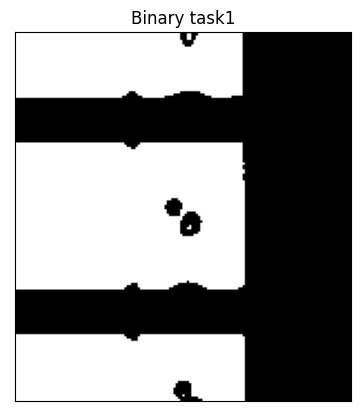

In [240]:
pad_task1 = cv2.imread('input/pad_task1.bmp', cv2.IMREAD_GRAYSCALE)

# Do the image binary to seperate pad and background
ret, pad_task1_thres = cv2.threshold(pad_task1, 100, 255, cv2.THRESH_BINARY)
show_img(pad_task1_thres, 'Binary task1', 'gray', False)
plt.show

cv2.imwrite('output/pad_task1_thres.bmp', pad_task1_thres)

True

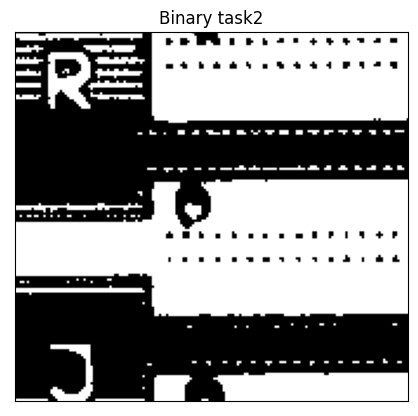

In [241]:
pad_task2 = cv2.imread('input/pad_task2.bmp', cv2.IMREAD_GRAYSCALE)

# Do the image binary to seperate pad and background
ret, pad_task2_thres = cv2.threshold(pad_task2, 120, 255, cv2.THRESH_BINARY)
show_img(pad_task2_thres, 'Binary task2', 'gray', False)
plt.show

cv2.imwrite('output/pad_task2_thres.bmp', pad_task2_thres)

True

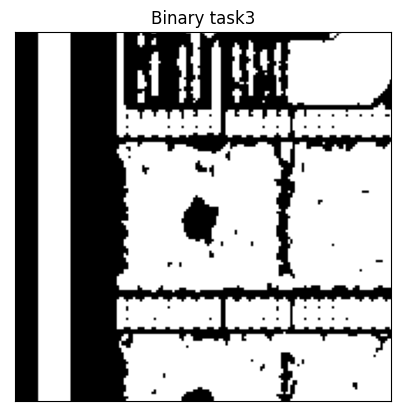

In [242]:
pad_task3 = cv2.imread('input/pad_task3.bmp', cv2.IMREAD_GRAYSCALE)

# Do the image binary to seperate pad and background
ret, pad_task3_thres = cv2.threshold(pad_task3, 100, 255, cv2.THRESH_BINARY)
show_img(pad_task3_thres, 'Binary task3', 'gray', False)
plt.show

cv2.imwrite('output/pad_task3_thres.bmp', pad_task3_thres)

### Questions:
1. What are the limits of this methods?
2. What if the light source is not uniform? Is this method still work? How to improve it?  

keywords: cv2.threshold

## 4. HSV filter
This method could extract the the interested part by color.  
Please crop the yellow or blue boxes and its surrounding in the image.

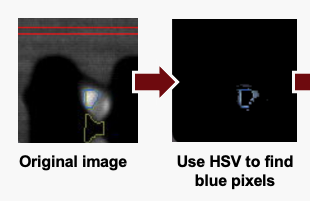
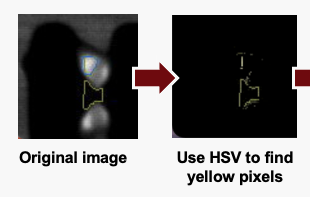

### Steps:
1. Transfer color to HSV.
2. Setting the color range and filter the image. (output the color image in the setting range)
3. Binary the image, find the left-top and right-bottom coordinate.
4. Crop the image by the coordinate.  

Noted: Blur, histogram equalization methods could be used if needed.  

True

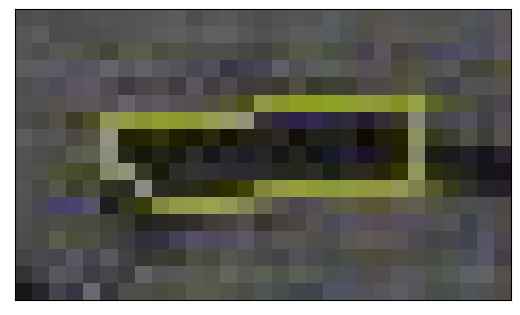

In [243]:
# Yellow box.
Fusheng_yellow = cv2.imread('input/Fusheng_yellow.jpg')

# Step 1. Transfer color to HSV
yellow_hsv = cv2.cvtColor(Fusheng_yellow, cv2.COLOR_BGR2HSV)

# Step 2. Setting the color range and filter the image.
lower_yellow = np.array([16, 26, 120])
upper_yellow = np.array([74, 255, 255])
mask_yellow = cv2.inRange(yellow_hsv, lower_yellow, upper_yellow)
img_yellow = cv2.bitwise_and(Fusheng_yellow, Fusheng_yellow, mask = mask_yellow)

# Step 3. Binary the image, find the left-top and right-bottom coordinate (x, y, w, h) or (x1, x2, y1, y2).
img_yellow = cv2.cvtColor(img_yellow, cv2.COLOR_BGR2GRAY)
_, yellow_thres = cv2.threshold(img_yellow, 1, 255, cv2.THRESH_BINARY)

contours_yellow, hierarchy = cv2.findContours(yellow_thres, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
x, y, w, h = cv2.boundingRect(contours_yellow[0])

# Step 4. Crop the image by the coordinate.
crop_edge = 5                                                                             # surrounding 20 pixels 
cropHSV_yellow = Fusheng_yellow[y-crop_edge: y+h+crop_edge, x-crop_edge: x+w+crop_edge]   # take (x, y, w, h) as example.
show_img(cropHSV_yellow, None, 'color', False)
plt.show

cv2.imwrite('output/cropHSV_yellow.jpg', cropHSV_yellow)

<function matplotlib.pyplot.show(close=None, block=None)>

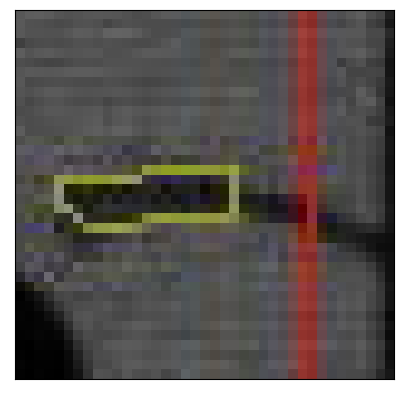

In [244]:
# Yellow box.
Fusheng_yellow = cv2.imread('input/Fusheng_yellow.jpg')

# Step 1. Transfer color to HSV
yellow_hsv = cv2.cvtColor(Fusheng_yellow, cv2.COLOR_BGR2HSV)

# Step 2. Setting the color range and filter the image.
lower_yellow = np.array([26, 43, 46])
upper_yellow = np.array([34, 255, 255])
mask_yellow = cv2.inRange(yellow_hsv, lower_yellow, upper_yellow)
img_yellow = cv2.bitwise_and(Fusheng_yellow, Fusheng_yellow, mask = mask_yellow)

# Step 3. Binary the image, find the left-top and right-bottom coordinate (x, y, w, h) or (x1, x2, y1, y2).
img_yellow = cv2.cvtColor(img_yellow, cv2.COLOR_BGR2GRAY)
_, yellow_thres = cv2.threshold(img_yellow, 1, 255, cv2.THRESH_BINARY)

kernel1 = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
kernel2 = cv2.getStructuringElement(cv2.MORPH_RECT, (2, 2))
yellow_thres = cv2.dilate(yellow_thres, kernel2)
yellow_thres = cv2.morphologyEx(yellow_thres, cv2.MORPH_OPEN, kernel1)

a = np.where(yellow_thres == 255)
x1 = a[1][0]
y1 = a[0][0]
x2 = a[1][-1]
y2 = a[0][-1]

# Step 4. Crop the image by the coordinate.
crop_edge = 15 
cropHSV_yellow = Fusheng_yellow[y1-crop_edge: y2+crop_edge, x1-crop_edge: x2+crop_edge]

show_img(cropHSV_yellow, None, 'color', False)
plt.show

True

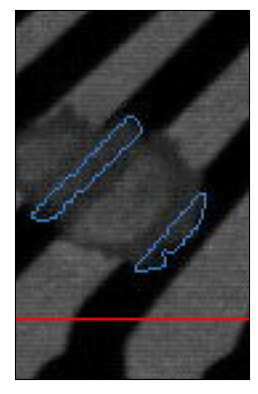

In [245]:
# Blue box.
Fusheng_blue = cv2.imread('input/Fusheng_blue.jpg')

# Step 1. Transfer color to HSV
gaussian_blur = cv2.GaussianBlur(Fusheng_blue, (7, 7), 0)
blue_hsv = cv2.cvtColor(gaussian_blur, cv2.COLOR_BGR2HSV)

# Step 2. Setting the color range and filter the image.
lower_blue = np.array([100, 43, 46])
upper_blue = np.array([124, 255, 255])
mask_blue = cv2.inRange(blue_hsv, lower_blue, upper_blue)
img_blue = cv2.bitwise_and(Fusheng_blue, Fusheng_blue, mask = mask_blue)

# Step 3. Binary the image, find the left-top and right-bottom coordinate (x, y, w, h) or (x1, x2, y1, y2).
img_blue = cv2.cvtColor(img_blue, cv2.COLOR_BGR2GRAY)
ret, blue_thres = cv2.threshold(img_blue, 1, 255, cv2.THRESH_BINARY)

a = np.where(blue_thres == 255)
x1 = a[1][0]
y1 = a[0][0]
x2 = a[1][-1]
y2 = a[0][-1]

# Step 4. Crop the image by the coordinate.
crop_edge = 40 
cropHSV_blue = Fusheng_blue[y1-crop_edge: y2+crop_edge, x1-crop_edge: x2+crop_edge]

show_img(cropHSV_blue, None, 'color', False)
plt.show

cv2.imwrite('output/cropHSV_blue.jpg', cropHSV_blue)

## 5. Morphological: erosion, dilation, open, close

Those methods help to denoise, enhance the features.   
Purpose: Use this methods to fill up the lines.
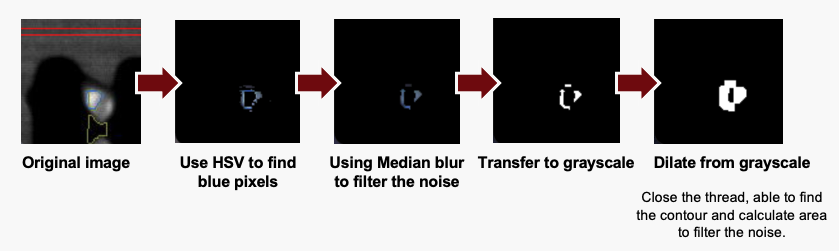

True

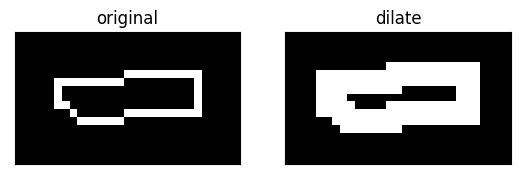

In [246]:
hsv_yellow = cv2.imread('output/cropHSV_yellow.jpg')

# Try to use erosion, dilation, open, close to fill up the lines.
img_gray = cv2.cvtColor(hsv_yellow, cv2.COLOR_BGR2GRAY)
ret, yellow_thres = cv2.threshold(img_gray, 108, 255, cv2.THRESH_BINARY)

kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
result = cv2.dilate(yellow_thres, kernel)

plt.subplot(121)
show_img(yellow_thres, 'original', 'gray', False)
plt.subplot(122)
show_img(result, 'dilate', 'gray', False)
plt.show

cv2.imwrite('output/morpho_yellow.jpg', result)

True

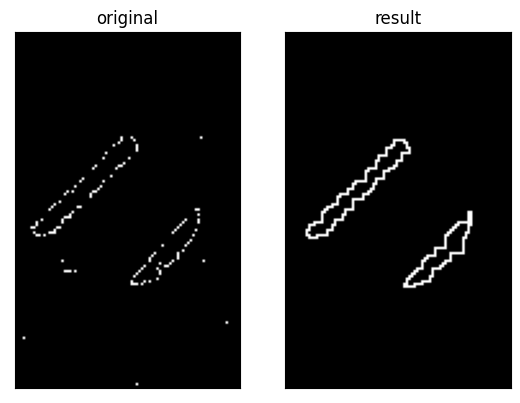

In [247]:
hsv_blue = cv2.imread('output/cropHSV_blue.jpg')

# Try to use erosion, dilation, open, close to fill up the lines.
img_gray = cv2.cvtColor(hsv_blue, cv2.COLOR_BGR2GRAY)
_, blue_thres = cv2.threshold(img_gray, 105, 255, cv2.THRESH_BINARY)

kernel1 = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3)) 
kernel2 = cv2.getStructuringElement(cv2.MORPH_RECT, (2, 2)) 

result = cv2.morphologyEx(blue_thres, cv2.MORPH_CLOSE, kernel1, iterations = 4)
result = cv2.erode(result, kernel2)
result = cv2.morphologyEx(result, cv2.MORPH_GRADIENT, kernel2)

plt.subplot(121)
show_img(blue_thres, 'original', 'gray', False)
plt.subplot(122)
show_img(result, 'result', 'gray', False)
plt.show

cv2.imwrite('output/morpho_blue.jpg', result)

keywords: cv2.erode, cv2.dilate, cv2.morpholopyEx

## 6. Find countours

Use package to find the contours in the image.
Practice:
1. Find the pad and probemark contours in the pad series images.
2. Calculate the countours area.
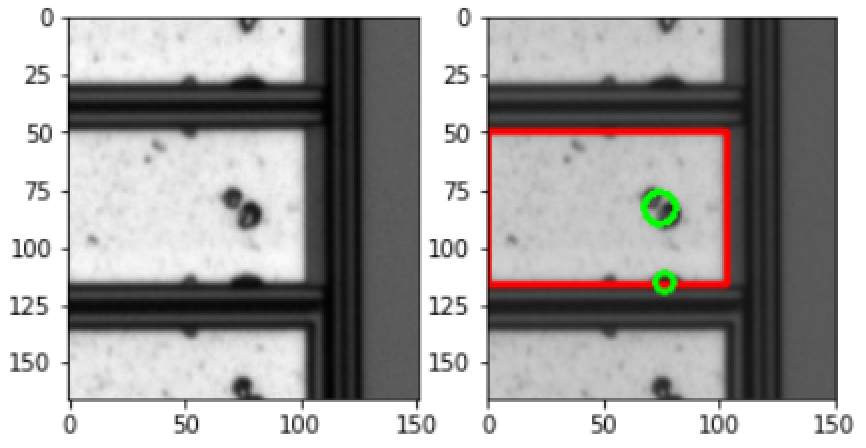

The pad area is  6798
The probe mark area is  148.0


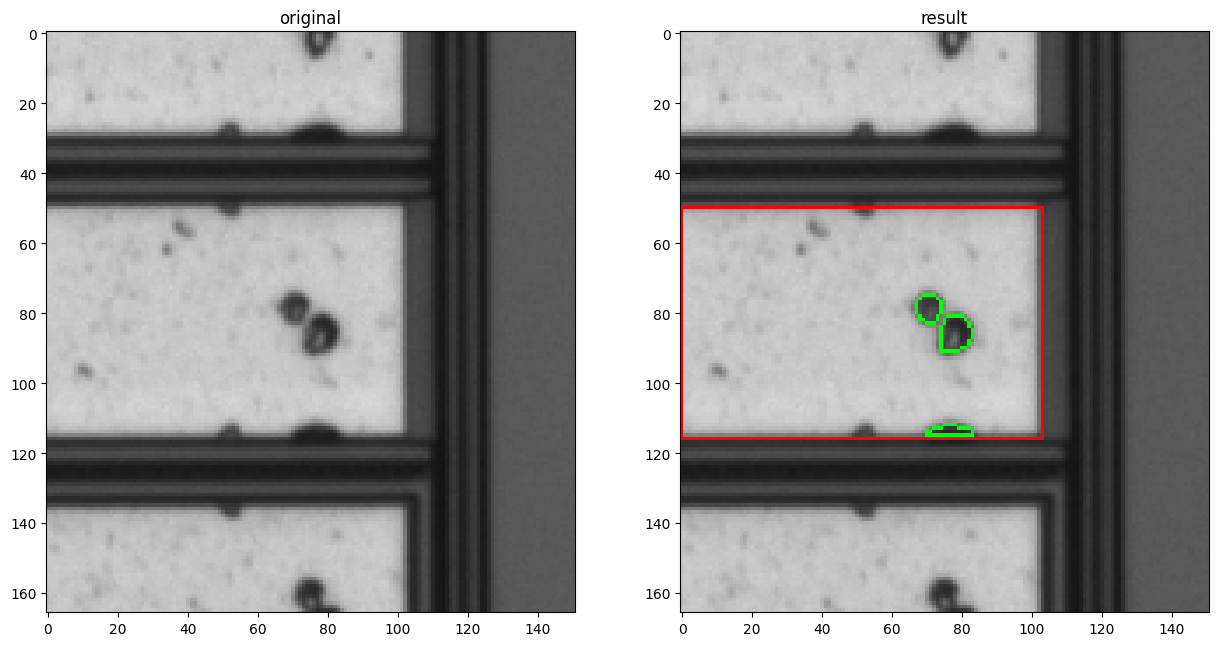

In [248]:
pad_task1 = cv2.imread('input/pad_task1.bmp', cv2.IMREAD_GRAYSCALE)

# Find the pad and probemark contours and draw.

# binary
_, pad_task1_thres = cv2.threshold(pad_task1, 110, 255, cv2.THRESH_BINARY)

# find the correct pad and calculate the area
contours_task1,_ = cv2.findContours(pad_task1_thres, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contours_area = []
for i in range(len(contours_task1)):
    contours_area.append(cv2.contourArea(contours_task1[i]))
X, Y, W, H = cv2.boundingRect(contours_task1[contours_area.index(max(contours_area))])
pad_area = W*H

# crop the pad and binery
pad = pad_task1[Y:Y+H, X:X+W]
_, pad_thres = cv2.threshold(pad, 110, 255, cv2.THRESH_BINARY_INV)

# use OPEN to eliminate noise
kernel1 = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3)) 
pad_thres = cv2.morphologyEx(pad_thres, cv2.MORPH_OPEN, kernel1)

# find probemark
contours_probemark,_ = cv2.findContours(pad_thres, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

# remove two point on the pad and calculate the area
probemark_area = 0
distance_top =[]
distance_bottom =[]
for i in range(len(contours_probemark)):
    x, y, w, h = cv2.boundingRect(contours_probemark[i])
    distance_top.append(((x+w/2)-pad.shape[1]/2)**2 + (y+h/2)**2)
    distance_bottom.append(((x+w/2)-pad.shape[1]/2)**2 + (pad.shape[0]-(y+h/2))**2)
    probemark_area += cv2.contourArea(contours_probemark[i])
    
a = distance_top.index(min(distance_top))
b = distance_bottom.index(min(distance_bottom))

probemark_area -= (cv2.contourArea(contours_probemark[a]) + cv2.contourArea(contours_probemark[b]))

probemark_list = list(contours_probemark)
if a > b:
    probemark_list.pop(a)
    probemark_list.pop(b)
else:
    probemark_list.pop(b)
    probemark_list.pop(a)

# draw the contours of the probemark
probemarkImg = cv2.cvtColor(pad, cv2.COLOR_GRAY2BGR)
probemarkImg = cv2.drawContours(probemarkImg, probemark_list, -1, (0, 255, 0), 1)

# merge to the original image
result = cv2.cvtColor(pad_task1, cv2.COLOR_GRAY2BGR)
result[Y:Y+H, X:X+W,:] = probemarkImg[:,:,:]

# draw boundingbox on pad
result = cv2.rectangle(result, (X, Y), (X+W, Y+H), (0, 0, 255), 1)

# show the result
plt.figure(figsize = (15, 15))
plt.subplot(121)
show_img(pad_task1, 'original', 'color')
plt.subplot(122)
show_img(result, 'result', 'color')
plt.show

# save and print result
cv2.imwrite('output/pad_task1_cont.bmp', result)
print('The pad area is ', pad_area)
print('The probe mark area is ', probemark_area)

The pad area is  6798
The probe mark area is  107.0


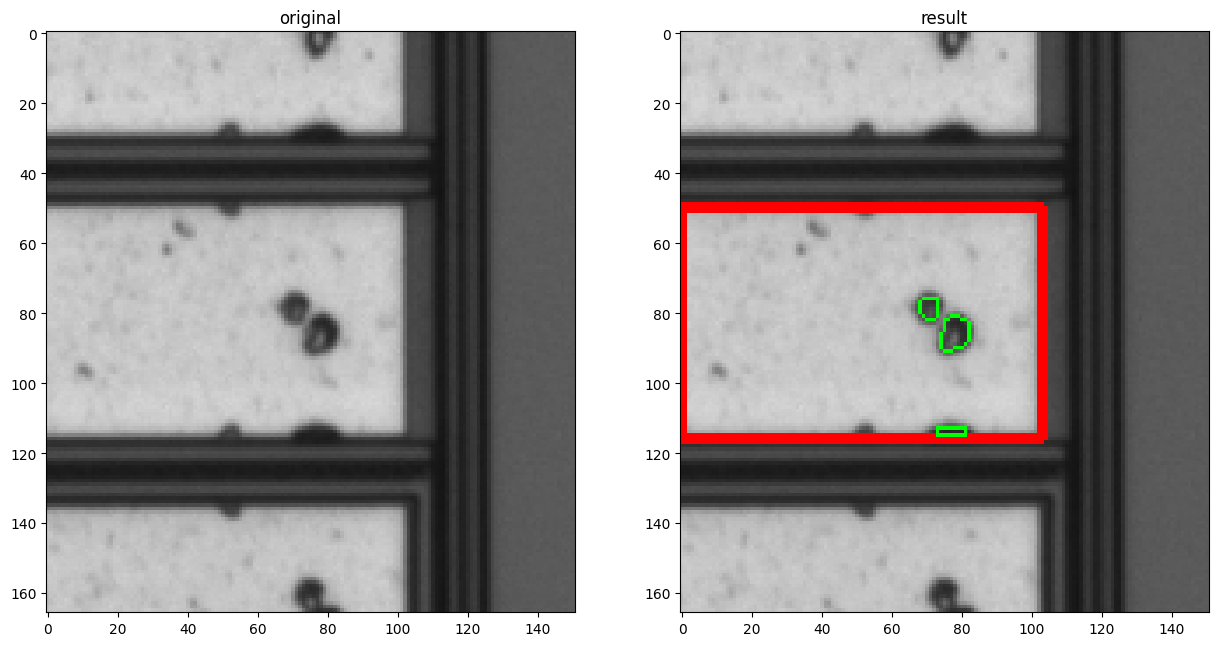

In [249]:
pad_task1 = cv2.imread('input/pad_task1.bmp', cv2.IMREAD_GRAYSCALE)

# Find the pad and probemark contours and draw.

pad_task1_blur = cv2.GaussianBlur(pad_task1, (5, 5), 0)

# binary
_, pad_task1_thres = cv2.threshold(pad_task1_blur, 100, 255, cv2.THRESH_BINARY)

# find the correct pad and calculate the area
contours_task1,_ = cv2.findContours(pad_task1_thres, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contours_area = []
for i in range(len(contours_task1)):
    contours_area.append(cv2.contourArea(contours_task1[i]))
X, Y, W, H = cv2.boundingRect(contours_task1[contours_area.index(max(contours_area))])
pad_area = W*H

# clean other regions
task1_copy = pad_task1_thres.copy()
task1_copy[:,:] = 255
task1_copy[Y:Y+H, X:X+W] = pad_task1_thres[Y:Y+H, X:X+W]
_, pad_thres = cv2.threshold(task1_copy, 100, 255, cv2.THRESH_BINARY_INV)

# use open to remove other noise
kernel1 = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
pad_thres = cv2.morphologyEx(pad_thres, cv2.MORPH_OPEN, kernel1, iterations = 1)

# find probemark
contours_probemark,_ = cv2.findContours(pad_thres, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

# calculate the area of the probemark
probemark_area = 0
for i in range(len(contours_probemark)):
    probemark_area += cv2.contourArea(contours_probemark[i])

# draw boundingbox on pad
result = cv2.cvtColor(pad_task1, cv2.COLOR_GRAY2BGR)
result = cv2.rectangle(result, (X, Y), (X+W, Y+H), (0, 0, 255), 2)

# draw the contours of the probemark
result = cv2.drawContours(result, contours_probemark, -1, (0, 255, 0), 1)

# show the result
plt.figure(figsize = (15, 15))
plt.subplot(121)
show_img(pad_task1, 'original', 'color')
plt.subplot(122)
show_img(result, 'result', 'color')
plt.show

print('The pad area is ', pad_area)
print('The probe mark area is ', probemark_area)

The pad area is  6264
The probe mark area is  163.0


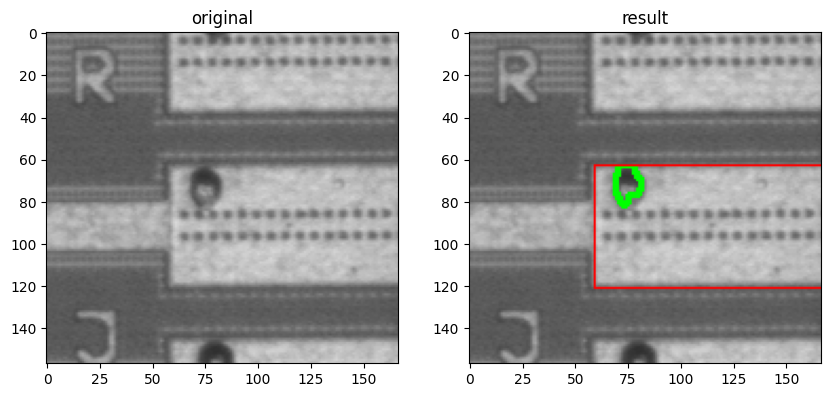

In [250]:
pad_task2 = cv2.imread('input/pad_task2.bmp', cv2.IMREAD_GRAYSCALE)

# Find the pad and probemark contours and draw.

task2_mask = pad_task2.copy()
task2_mask[:, 0:59] = 0

# binary
_, pad_task2_thres = cv2.threshold(task2_mask, 125, 255, cv2.THRESH_BINARY)

# find the correct pad and calculate the area
contours_task2,_ = cv2.findContours(pad_task2_thres, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contours_area = []
for i in range(len(contours_task2)):
    contours_area.append(cv2.contourArea(contours_task2[i]))
X, Y, W, H = cv2.boundingRect(contours_task2[contours_area.index(max(contours_area))])
pad_area = W*H

# crop the pad and binery (use Gaussian blur, erode and close)
pad = task2_mask[Y:Y+H, X:X+W]

pad_blur = cv2.GaussianBlur(pad, (7, 7), 0)

_, pad_thres = cv2.threshold(pad_blur, 125, 255, cv2.THRESH_BINARY_INV)

kernel1 = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
kernel2 = cv2.getStructuringElement(cv2.MORPH_RECT, (2, 2))
pad_thres = cv2.erode(pad_thres, kernel1, iterations = 1)
pad_thres = cv2.morphologyEx(pad_thres, cv2.MORPH_CLOSE, kernel1, iterations = 3)

# find probemark
contours_probemark,_ = cv2.findContours(pad_thres, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

# calculate the area of the probemark
probemark_area = 0
for i in range(len(contours_probemark)):
    probemark_area += cv2.contourArea(contours_probemark[i])
    
# draw the contours of the probemark
probemarkImg = cv2.cvtColor(pad, cv2.COLOR_GRAY2BGR)
probemarkImg = cv2.drawContours(probemarkImg, contours_probemark, -1, (0, 255, 0), 2)

# merge to the original image
result = cv2.cvtColor(pad_task2, cv2.COLOR_GRAY2BGR)
result[Y:Y+H, X:X+W,:] = probemarkImg[:,:,:]

# draw boundingbox on pad
result = cv2.rectangle(result, (X, Y), (X+W, Y+H), (0, 0, 255), 1)

# show the result
plt.figure(figsize = (10, 10))
plt.subplot(121)
show_img(pad_task2, 'original', 'color')
plt.subplot(122)
show_img(result, 'result', 'color')
plt.show

# save and print result
cv2.imwrite('output/pad_task2_cont.bmp', result)
print('The pad area is ', pad_area)
print('The probe mark area is ', probemark_area)

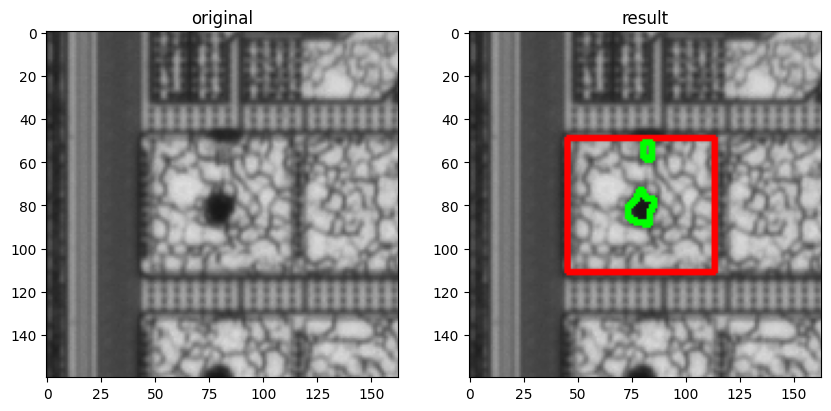

The pad area is  4216
The probe mark area is  150.0


In [251]:
pad_task3 = cv2.imread('input/pad_task3.bmp', cv2.IMREAD_GRAYSCALE)

# Find the pad and probemark contours and draw.

task3_blur = cv2.medianBlur(pad_task3, 5)

# binary
_, pad_task3_thres = cv2.threshold(task3_blur, 130, 255, cv2.THRESH_BINARY)

# find the correct pad and calculate the area
contours_task3,_ = cv2.findContours(pad_task3_thres, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contours_area = []
for i in range(len(contours_task3)):
    contours_area.append(cv2.contourArea(contours_task3[i]))
X, Y, W, H = cv2.boundingRect(contours_task3[contours_area.index(max(contours_area))])
pad_area = W*H

# clean other regions
task3_copy = pad_task3_thres.copy()
task3_copy[:,:] = 255
task3_copy[Y:Y+H, X:X+W] = pad_task3_thres[Y:Y+H, X:X+W]

task3_copy = cv2.GaussianBlur(task3_copy, (3, 3), 0)
_, pad_thres = cv2.threshold(task3_copy, 1, 255, cv2.THRESH_BINARY_INV)

# use open and erode to remove other noise
kernel1 = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
pad_thres = cv2.morphologyEx(pad_thres, cv2.MORPH_OPEN, kernel1, iterations = 2)
pad_thres = cv2.erode(pad_thres, kernel1, iterations = 1)

# find probemark
contours_probemark,_ = cv2.findContours(pad_thres, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

# calculate the area of the probemark
probemark_area = 0
for i in range(len(contours_probemark)):
    probemark_area += cv2.contourArea(contours_probemark[i])
    
# draw boundingbox on pad
result = cv2.cvtColor(pad_task3, cv2.COLOR_GRAY2BGR)
result = cv2.rectangle(result, (X, Y), (X+W, Y+H), (0, 0, 255), 2)

# draw the contours of the probemark
result = cv2.drawContours(result, contours_probemark, -1, (0, 255, 0), 2)

# show and print the result
plt.figure(figsize = (10, 10))
plt.subplot(121)
show_img(pad_task3, 'original', 'color')
plt.subplot(122)
show_img(result, 'result', 'color')
plt.show()

cv2.imwrite('output/pad_task3_cont.bmp', result)
print('The pad area is ', pad_area)
print('The probe mark area is ', probemark_area)

keywords:  
cv2.findContours, cv2.contourArea